# Model Evaluation Metrics

## Model Testing

Always verify your model using **test data**.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = np.asarray(pd.read_csv('data/testing-data.csv', header=None))
X = data[:,0:2]
y = data[:,2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = model.score(X_test, y_test)

acc

0.9583333333333334

## Confusion Matrix

How good is our model?

* **Spam**: we don't want **False Positives** but **False Negatives** are Ok, i.e. we want a high **Precision**.
* **Sickness**: we don't want **False Negatives** but **False Positives** are Ok, i.e. we want a high **Recall**.

#### Type 1 and Type 2 Errors

Sometimes in the literature, you'll see False Positives and False Negatives as **Type 1** and **Type 2 errors**. 

* **Type 1 Error** (Error of the first kind, or False Positive): In the medical example, this is when we misdiagnose a healthy patient as sick.
* **Type 2 Error** (Error of the second kind, or False Negative): In the medical example, this is when we misdiagnose a sick patient as healthy.

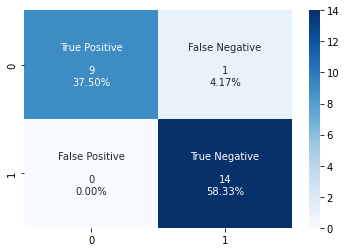

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cfm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues');

#### Accuracy

Out of all the observations, **how many** did we classify **correctly**?

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FN} + \text{FP} + \text{TN}}
$$

In [18]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_test)

print(f'Accuracy = {acc:.2}')

Accuracy = 0.96


#### Precision

Precision answeres the following questions:

* Out of the points we've predicted to be positive, how many are correct?
* How many retrieved items are relevant?

Examples:

* Out of the patients we **diagnosed** with an illness, how many did we classify correctly as **sick**? The value can be **low**!
* Out of all the **emails** sent to the **spam folder**, how many were actually **spam**? The value should be **high**!

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

In [19]:
from sklearn.metrics import precision_score
precision = precision_score(y_pred, y_test)

print(f'Precision = {precision:.2}')

Precision = 1.0


#### Recall

Recall does answer the following questions:

* Out of the points they are labeled positive, how many of them are predicted correctly as positive?
* How many relevant items are retieved?

Example:

* Out of the **sick patients**, how many did we **correctly diagnose** as sick? The value should be **high**!
* From all the **spam emails**, how many were **correctly** sent to the **spam folder**? The value can be **low**!

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

In [20]:
from sklearn.metrics import recall_score
recall = recall_score(y_pred, y_test)

print(f'Recall = {recall:.2}')

Recall = 0.93
